# Naive Bayes

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt


# Enable python to import modules from parent directory
import sys
sys.path.append("..")

from src.config import *

# https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None

In [2]:
data_path = os.path.join(DATA_CLEAN_PATH, "ml-curated-data.csv")
data = pd.read_csv(data_path, encoding='latin1')

In [3]:
data.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816,0.028896


In [4]:
naive_bayes = GaussianNB(var_smoothing=1)

In [5]:
# take only 70 percent of data
train_data = data.sample(frac=0.7)

In [6]:
train_data_x = data.drop(columns=['wage_increase'])
train_data_x.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816


In [7]:
train_data_y = train_data['wage_increase']

In [8]:
train_data_y.head()

1478   -0.017966
7650   -0.014144
5170    0.030225
4743    0.017688
1791    0.133188
Name: wage_increase, dtype: float64

In [9]:
# naive bayes cant detect data type
train_data_y = np.asarray(data['wage_increase'], dtype="|S9")

In [10]:
naive_bayes.fit(train_data_x, train_data_y)

GaussianNB(priors=None, var_smoothing=1)

In [11]:
predicted = pd.to_numeric(naive_bayes.predict([train_data_x.iloc[0]]))

In [12]:
expected = data.iloc[0]['wage_increase']
pd.to_numeric(expected)

0.07523202914031679

In [13]:
pd.to_numeric(predicted[0])

0.07523200000000001

## Error distribution Naive Bayes

In [14]:
estimates_nb = naive_bayes.predict(train_data_x)

In [15]:
estimates_nb

array([b'0.0752320', b'-0.021314', b'-0.001977', ..., b'-0.102455',
       b'0.1181474', b'0.0237626'], dtype='|S12')

In [16]:
estimates_nb_numeric = pd.to_numeric(estimates_nb)

In [17]:
train_data_y_numeric = pd.to_numeric(train_data_y)

In [18]:
error_nb = np.asmatrix(train_data_y_numeric - estimates_nb_numeric)

In [19]:
error_nb

matrix([[ 0.0000e+00, -8.0000e-06, -2.1184e-02, ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00]])

In [20]:
sme_nb = (error_nb.T * error_nb / len(error_nb)).tolist()[0][0]

In [21]:
sme_nb

0.0

In [22]:
np.sqrt(sme_nb)

0.0

In [23]:
error_list = error_nb.tolist()

In [24]:
df_errors = pd.DataFrame({'error': [e for ls in error_nb.tolist() for e in ls]})

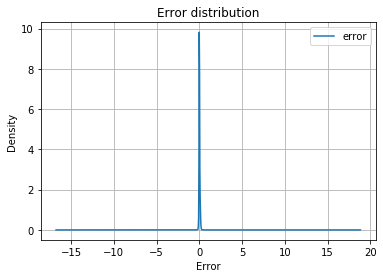

,error
count,1.126400e+06
mean,1.861650e+00
std,1.753166e+01
min,-7.850737e+02
25%,0.000000e+00
50%,0.000000e+00
75%,2.667185e+00
max,9.932953e+02


In [25]:
df_errors.plot.kde()
plt.title("Error distribution")
plt.xlabel("Error")
plt.grid()
plt.show()

100 * df_errors.describe()

In [38]:
test = pd.DataFrame({
    "y": data['wage_increase'],
    "y_estimate": pd.to_numeric(estimates_nb)
})

In [41]:
test.describe()

,y,y_estimate
count,11264.000000,11264.000000
mean,0.018413,0.000218
std,0.096095,0.138565
min,-0.481331,-8.029154
25%,-0.033108,-0.033490
50%,0.010493,-0.017496
75%,0.061113,0.023126
max,0.743608,0.743607


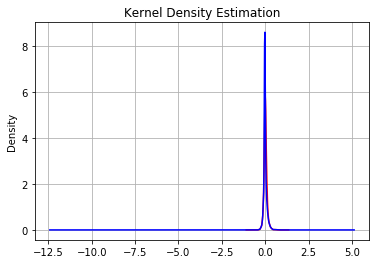

In [40]:
test.y.plot.kde(c='r')
test.y_estimate.plot.kde(c='b')
plt.title("Kernel Density Estimation")
plt.grid()
plt.show()

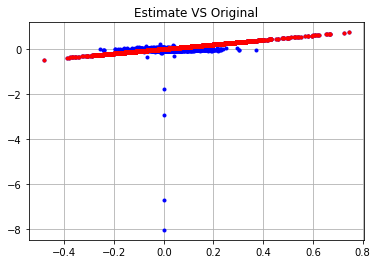

In [43]:
plt.plot(test.y, test.y_estimate, '.b')
plt.plot(test.y, test.y, '.r')
plt.title("Estimate VS Original")
plt.grid()
plt.show()